# Experiment 1

Model: **XGBoost** 

Feature in: 
- Year
- Month

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('../../data/data.csv', parse_dates=['date'], index_col='date', dayfirst=True)
data.dropna(inplace=True)
data.columns = ['consumption']
data

,consumption
date,
2004-01-01,26978358.02
2004-02-01,26508170.77
2004-03-01,27284329.41
2004-04-01,28046182.35
2004-05-01,27244506.48
...,...
2024-03-01,47837268.44
2024-04-01,47350865.66
2024-05-01,47050366.66


<Axes: xlabel='date'>

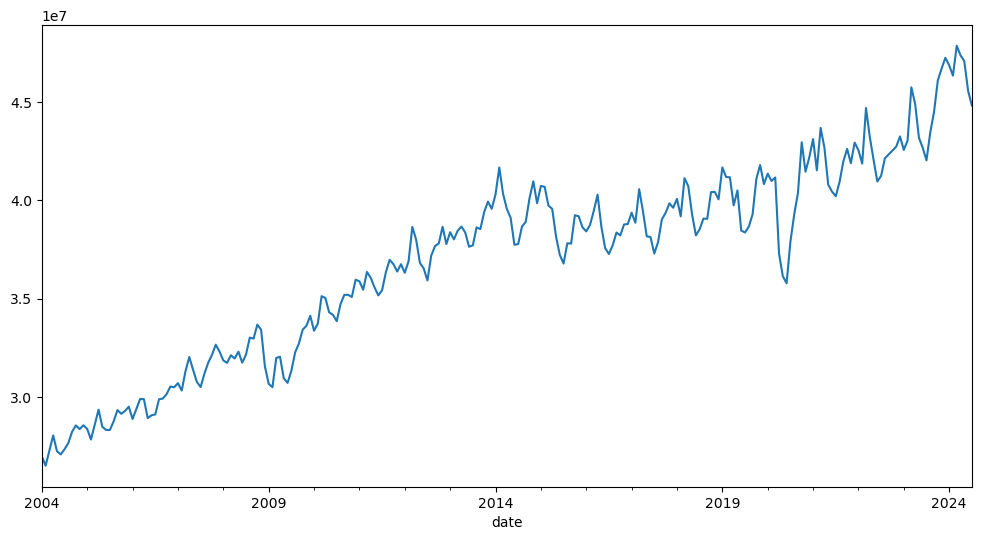

In [5]:
data['consumption'].plot(figsize=(12, 6), kind='line')

In [11]:
data['month'] = data.index.month
data['year'] = data.index.year
X = data.drop('consumption', axis=1)
y = data['consumption']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=12, shuffle=False)

In [13]:
model = xgb.XGBRegressor(random_state=42, n_estimators=10000, early_stopping_rounds=100, eval_metric='mape', learning_rate=0.1)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

[0]	validation_0-mape:0.19688
[100]	validation_0-mape:0.06878
[200]	validation_0-mape:0.06853
[300]	validation_0-mape:0.06851
[400]	validation_0-mape:0.06853
[434]	validation_0-mape:0.06853


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric='mape', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

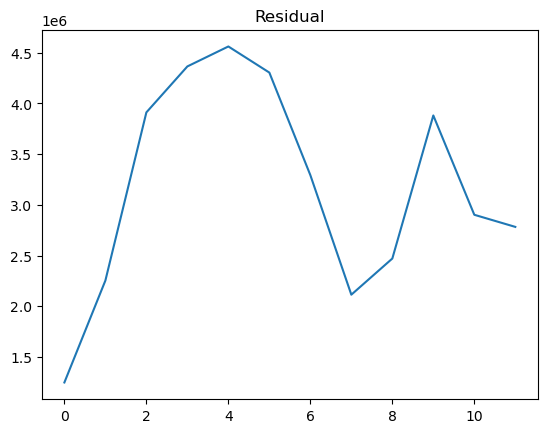

In [14]:
plt.plot(y_test.values - model.predict(X_test))
plt.title('Residual')
plt.show()

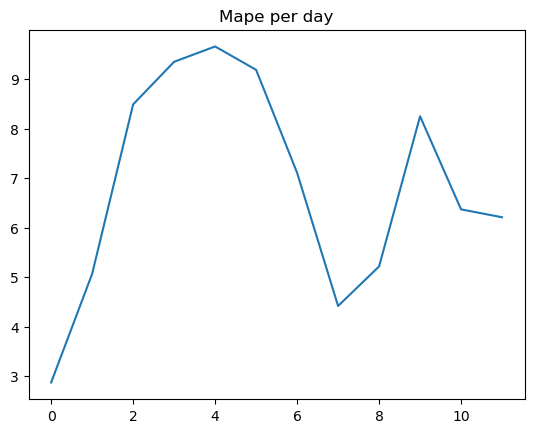

In [15]:
plt.plot(np.abs(y_test.values - model.predict(X_test))/y_test.values*100)
plt.title('Mape per day')
plt.show()

In [16]:
pd.Series(model.predict(X_test)).to_csv('results/fitted_value.csv', index=False, header='Residuals')